# Análisis y procesamiento de señales - Trabajo semanal Nº 8 #
# Aramayo Yohana Valentina #

Dado las siguientes ecuaciones en diferencias de los siguientes sistemas, que representan un filtro de media móvil: 

a) y(n)= x(n−3) + x(n−2) + x(n−1) + x(n)

b) y(n)= x(n−4) + x(n−3) + x(n−2) + x(n−1) + x(n)

c)  y(n)= x(n) − x(n−1)

d)  y(n)= x(n) − x(n−2)
 
Se pide:

1) Hallar T(z) = Y(z)/X(z)
.
2) Calcular su respuesta en frecuencia de módulo y fase.

3) Simular y validar la respuesta en frecuencia de todos los sistemas con Numpy.

<div align="center">
    <h2><strong>DESARROLLO </strong></h2>
</div>

**a) y(n)= x(n−3) + x(n−2) + x(n−1) + x(n)**

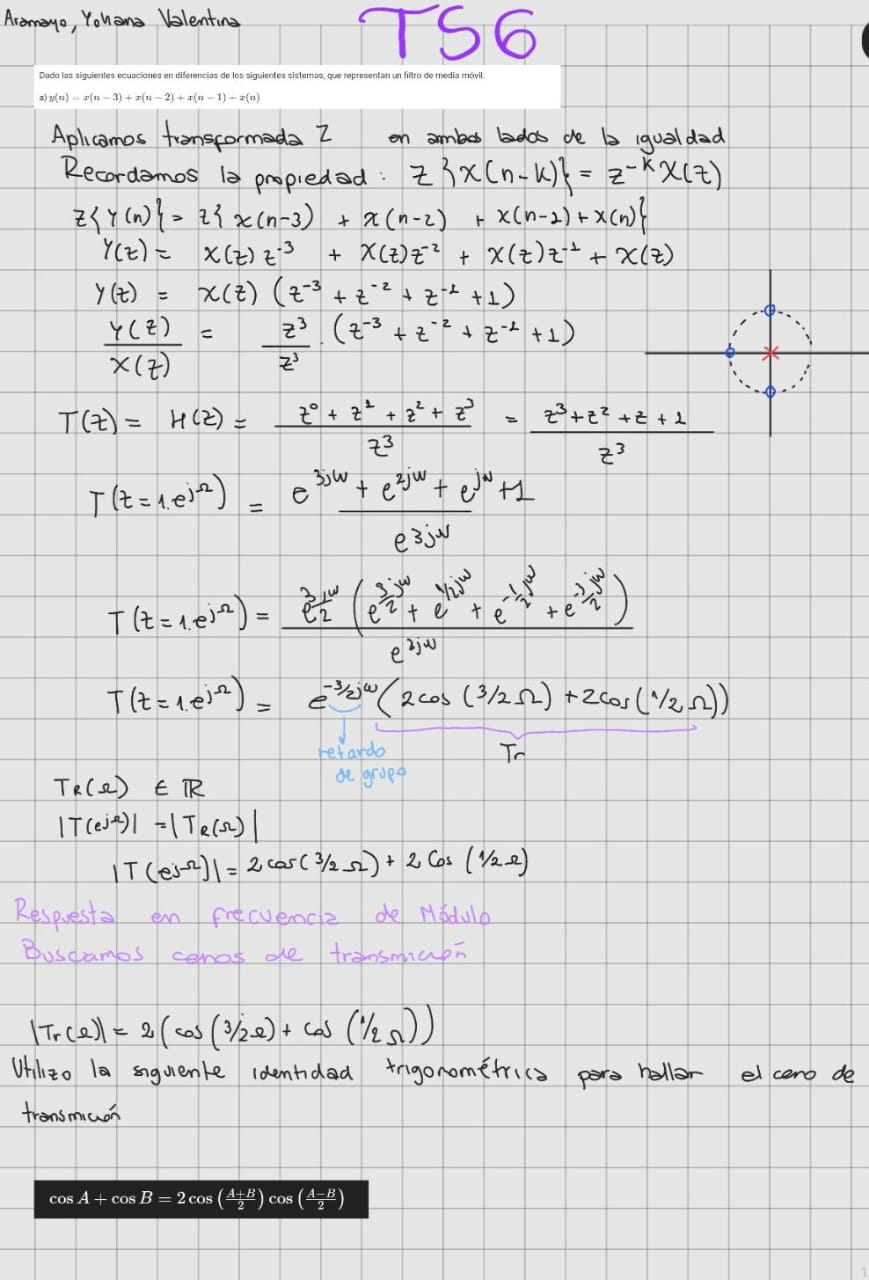
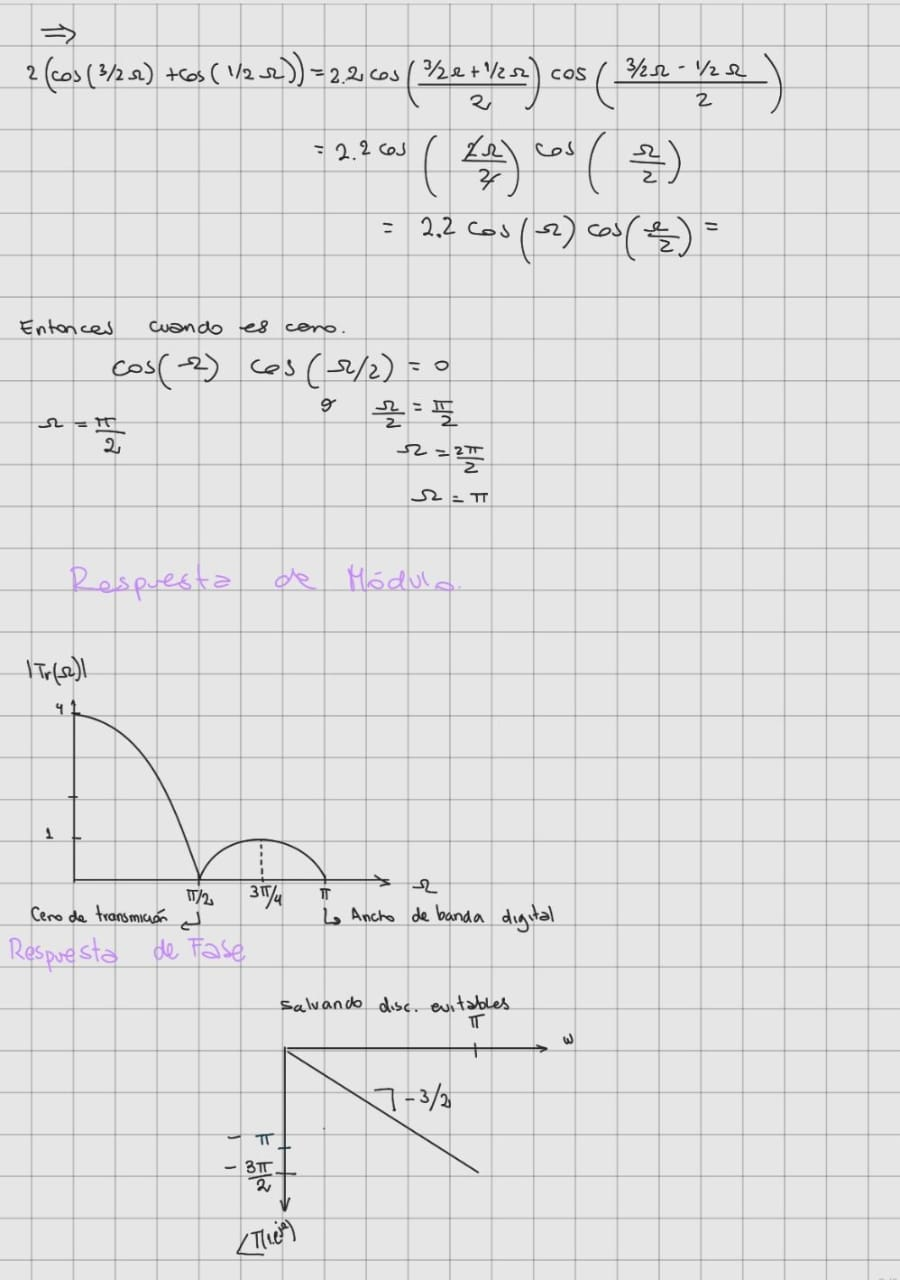 


**b) y(n)= x(n−4) + x(n−3) + x(n−2) + x(n−1) + x(n)**


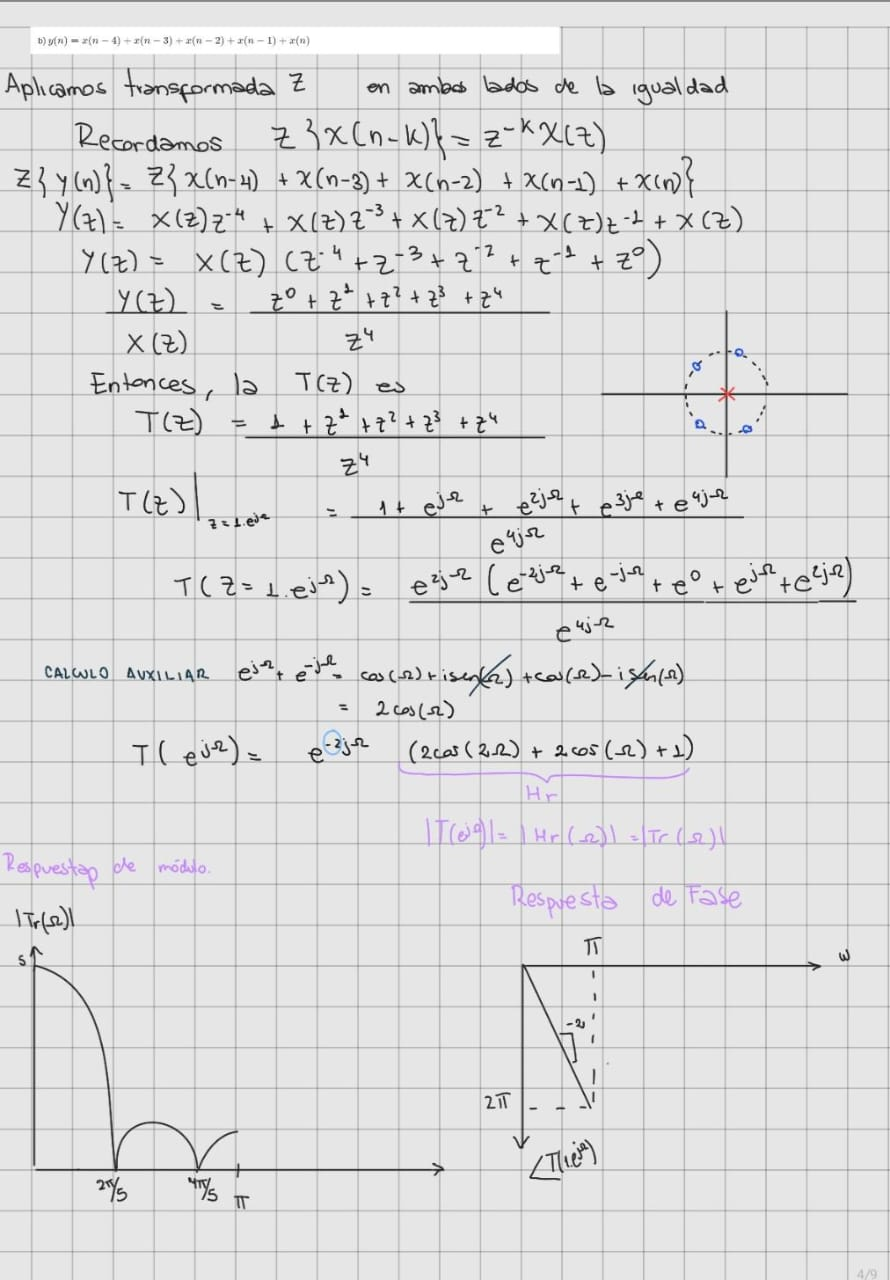

Las ecuaciones de diferencias que comprenden sumas de términos, como en el item a y b (y(n)=x(n)+x(n−1)+...), se pueden ver como filtros integradores porque lo que hacen es acumular muestras anteriores. Eso genera un efecto de suavizado en la señal, y por eso se comportan como filtros pasa bajos: dejan pasar las frecuencias más bajas y atenúan las más altas. La respuesta de este filtro pasabajos es del tipo sinc. Podemos notar que a medida que aumentamos el número de coeficientes, aumentan los ceros de transmición. 

 **c)  y(n)= x(n) − x(n−1)**


 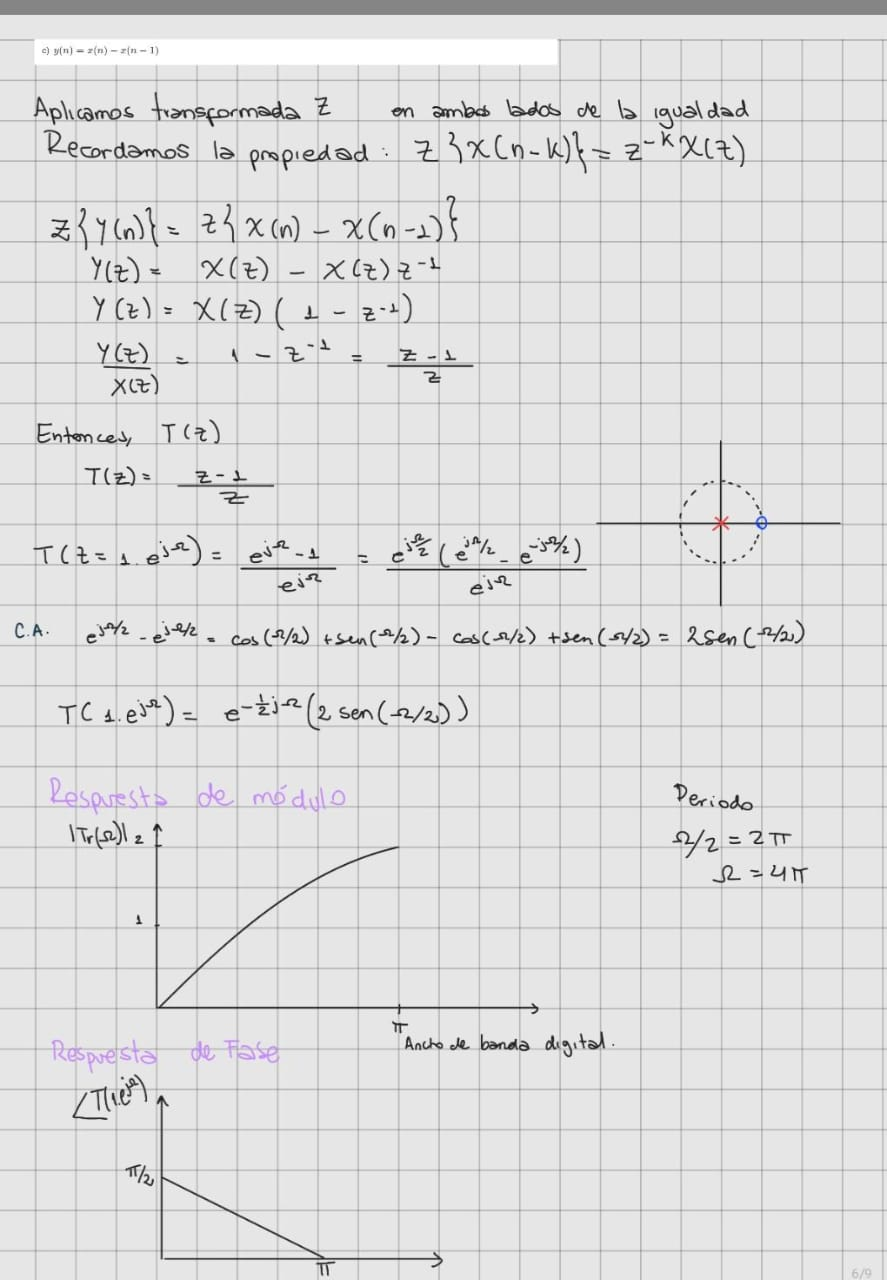


En este caso este filtro es un pasa altos, también conocido como derivador.
Lo que hace este, es calcular la diferencia entre dos muestras consecutivas, resaltando los cambios rápidos de la señal.
Presenta un cero en el origen (ω=0), lo que significa que elimina las componentes de baja frecuencia (como las constantes o señales muy lentas).
Su respuesta en frecuencia crece linealmente con la frecuencia (hasta cierto punto), por eso resalta las partes rápidas, como bordes o transiciones.
Idealmente deriva hasta alrededor del 25% del ancho de banda digital.

**d)  y(n)= x(n)− x(n−2)**


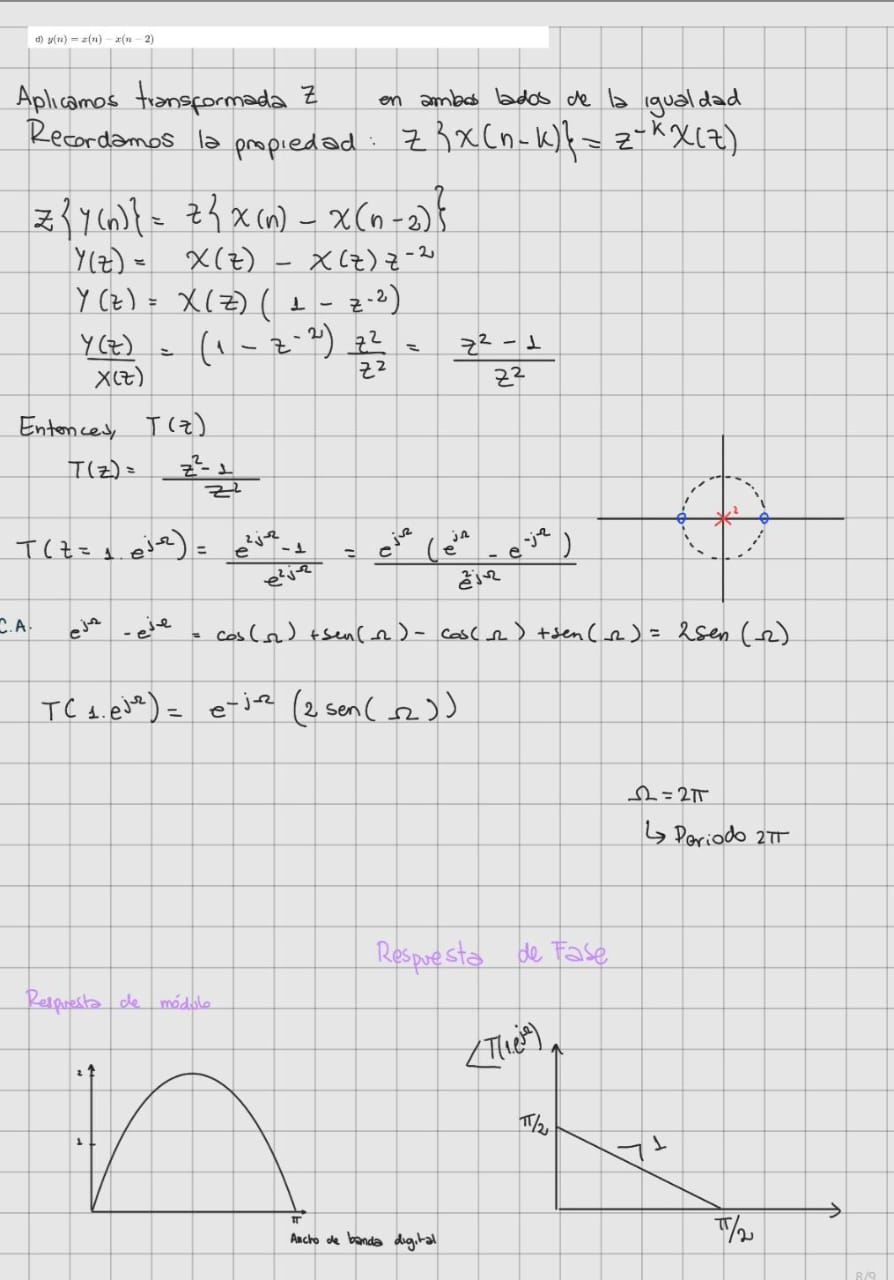

Este filtro también actúa como un derivador, pero con un espacio de 2 muestras. Su comportamiento se parece a un pasa banda, porque: tiene ceros tanto en 
𝜔=0 como en ω=π. Eso significa que elimina las frecuencias bajas y altas, y deja pasar las intermedias. 


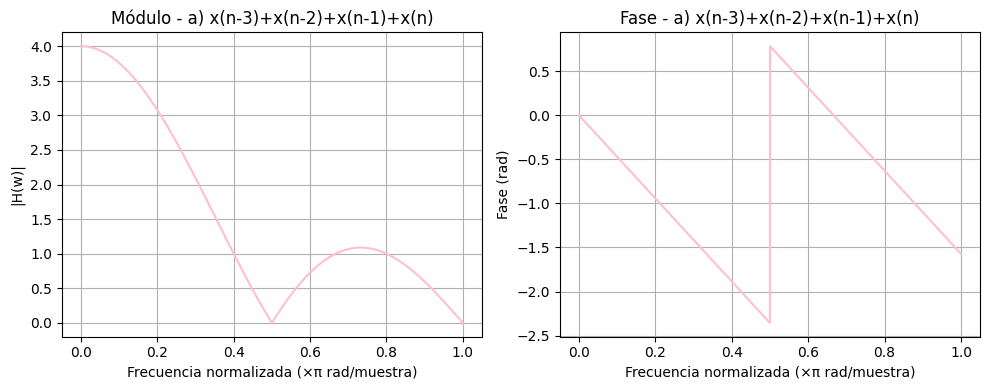

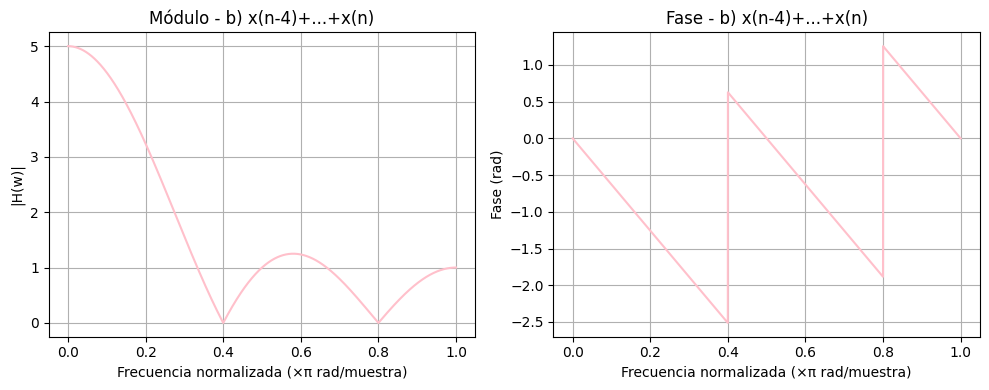

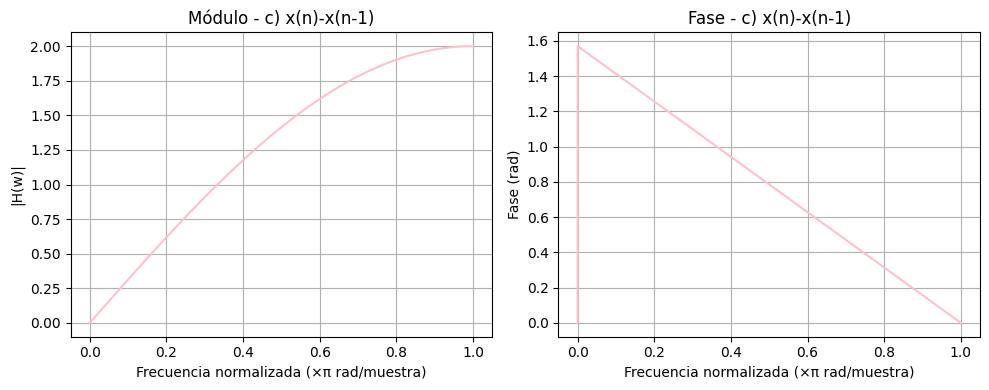

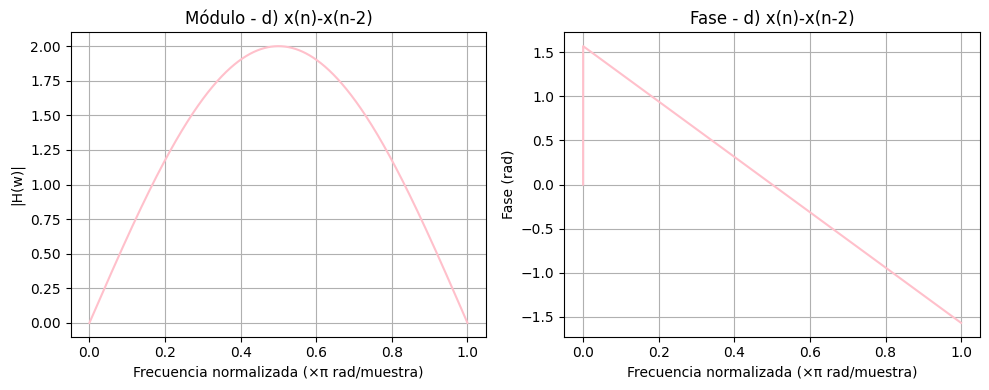

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Respuestas al impulso de cada sistema
h_a = np.array([1, 1, 1, 1])         # x(n-3)+x(n-2)+x(n-1)+x(n)
h_b = np.array([1, 1, 1, 1, 1])      # x(n-4)+...+x(n)
h_c = np.array([1, -1])              # x(n)-x(n-1)
h_d = np.array([1, 0, -1])           # x(n)-x(n-2)

# Lista de sistemas
systems = [
    (h_a, 'a) x(n-3)+x(n-2)+x(n-1)+x(n)'),
    (h_b, 'b) x(n-4)+...+x(n)'),
    (h_c, 'c) x(n)-x(n-1)'),
    (h_d, 'd) x(n)-x(n-2)')
]

# Gráficos
for h, title in systems:
    w, H = freqz(h, worN=8000)
    plt.figure(figsize=(10, 4))

    # Módulo
    plt.subplot(1, 2, 1)
    plt.plot(w/np.pi, np.abs(H), color='pink')
    plt.title(f'Módulo - {title}')
    plt.xlabel('Frecuencia normalizada (×π rad/muestra)')
    plt.ylabel('|H(w)|')
    plt.grid(True)

    # Fase
    plt.subplot(1, 2, 2)
    plt.plot(w/np.pi, np.angle(H), color='pink')
    plt.title(f'Fase - {title}')
    plt.xlabel('Frecuencia normalizada (×π rad/muestra)')
    plt.ylabel('Fase (rad)')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

Todos los filtros que vimos en esta TS son FIR porque no dependen de salidas anteriores, solo de entradas anteriores (muestras pasadas de la señal), así que son estables. No hay riesgo de que la salida se dispare o se vuelva inestable, y por eso no hace falta preocuparse por los polos ni nada raro como en los IIR.